## **Setup**

In [ ]:
cd /content/drive/MyDrive/ML/Assignment_6

In [ ]:
!git clone https://github.com/cvlab-stonybrook/LearningToCountEverything.git

In [ ]:
!unzip images_384_VarV2.zip

In [ ]:
cd /content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything/data

/content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything/data


In [ ]:
!unzip mask_images.zip

In [ ]:
cd /content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything


/content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything


In [ ]:
ls

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
rm -rf *.npy

In [ ]:
!python demo.py --input-image orange.jpg --bbox-file orange_box_ex.txt 

# **Q2.2**

In [ ]:
!python test.py --test_split val

Evaluation on val data
  0% 0/1286 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
190.jpg : actual-predicted:     13,   60.9, error:   47.9. Current MAE: 47.91, RMSE: 47.91:   0% 0/1286 [00:00<?, ?it/s]
191.jpg : actual-predicted:     15,   16.3, error:    1.3. Current MAE: 24.60, RMSE: 33.89:   0% 1/1286 [00:01<11:57,  1.79it/s]
192.jpg : actual-predicted:     19,   16.9, error:    2.1. Current MAE: 17.09, RMSE: 27.70:   0% 2/1286 [00:01<12:04,  1.77it/s]
194.jpg : actual-predicted:     82,   63.6, error:   18.4. Current MAE: 17.41, RMSE: 25.68:   0% 3/1286 [00:02<12:08,  1.76it/s]
195.jpg : actual-predicted:     10,    9.9, error:    0.1. Current MAE: 13.94, RMSE

Text(0, 0.5, 'Predicted Count')

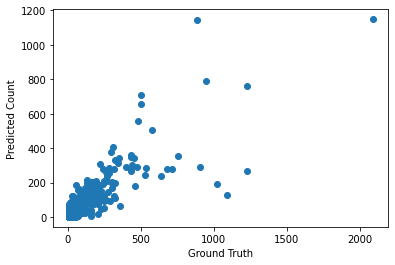

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gt_cnt_arr = np.array(np.load("gt_cnt_arr.npy"))
pred_cnt_arr = np.array(np.load("pred_cnt_arr.npy"))
count_errors1 = np.array(np.load("count_errors1.npy"))
count_errors2 = np.array(np.load("count_errors2.npy"))

plt.scatter(gt_cnt_arr, pred_cnt_arr)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Count')

Over-Count

In [ ]:
import json
f = open('./data/annotation_Val_Test_384_VarV2.json')
data = json.load(f)

for i in count_errors1:
  bboxes = data[i[0]]['box_examples_coordinates']
  rects = list()
  for bbox in bboxes:
      x1, y1 = bbox[0][0], bbox[0][1]
      x2, y2 = bbox[2][0], bbox[2][1]
      rects.append([y1, x1, y2, x2])

  f = open(str(i[0])+'_out1.txt', 'w+')
  for k in rects:
    txt=str(k[0])
    for j in k[1:]:
      txt = txt + " " + str(j)
    f.write(txt + "\n")
  f.close()

  print(i)

['1994.jpg' '94.35723876953125']
['1936.jpg' '205.88018798828125']
['7477.jpg' '123.7205810546875']
['3437.jpg' '156.24151611328125']
['3425.jpg' '257.7421875']


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/1994.jpg --bbox-file 1994.jpg_out1.txt 

Bounding boxes: [[234, 366, 261, 391], [122, 161, 149, 188], [197, 309, 226, 336]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 407.36
===> Visualized output is saved to ./1994_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/1936.jpg --bbox-file 1936.jpg_out1.txt 

Bounding boxes: [[113, 111, 124, 128], [136, 233, 148, 248], [98, 341, 110, 361]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 706.88
===> Visualized output is saved to ./1936_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/7477.jpg --bbox-file 7477.jpg_out1.txt 

Bounding boxes: [[293, 306, 297, 312], [189, 367, 196, 381], [202, 73, 208, 90], [232, 137, 239, 149]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 183.72
===> Visualized output is saved to ./7477_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/3437.jpg --bbox-file 3437.jpg_out1.txt 

Bounding boxes: [[202, 244, 209, 252], [169, 167, 176, 175], [148, 228, 157, 240]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 657.24
===> Visualized output is saved to ./3437_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/3425.jpg --bbox-file 3425.jpg_out1.txt 

Bounding boxes: [[150, 228, 154, 235], [166, 251, 171, 257], [183, 275, 187, 280]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 1142.74
===> Visualized output is saved to ./3425_out.png


Under Count

In [ ]:
import json
f = open('./data/annotation_Val_Test_384_VarV2.json')
data = json.load(f)

for i in count_errors2:
  bboxes = data[i[0]]['box_examples_coordinates']
  rects = list()
  for bbox in bboxes:
      x1, y1 = bbox[0][0], bbox[0][1]
      x2, y2 = bbox[2][0], bbox[2][1]
      rects.append([y1, x1, y2, x2])

  f = open(str(i[0])+'_out2.txt', 'w+')
  for k in rects:
    txt=str(k[0])
    for j in k[1:]:
      txt = txt + " " + str(j)
    f.write(txt + "\n")
  f.close()

  print(i)

['935.jpg' '943.616455078125']
['865.jpg' '828.5820007324219']
['949.jpg' '962.5203552246094']
['7656.jpg' '962.3381958007812']
['3665.jpg' '616.4561157226562']


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/935.jpg --bbox-file 935.jpg_out2.txt 

Bounding boxes: [[126, 197, 132, 204], [121, 323, 128, 331], [115, 311, 119, 315]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 1148.38
===> Visualized output is saved to ./935_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/865.jpg --bbox-file 865.jpg_out2.txt 

Bounding boxes: [[117, 357, 153, 362], [221, 206, 229, 241], [162, 294, 198, 300], [109, 238, 145, 242], [286, 345, 294, 366]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 193.42
===> Visualized output is saved to ./865_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/949.jpg --bbox-file 949.jpg_out2.txt 

Bounding boxes: [[150, 258, 160, 266], [88, 254, 97, 263], [281, 309, 297, 334]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 129.48
===> Visualized output is saved to ./949_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/7656.jpg --bbox-file 7656.jpg_out2.txt 

Bounding boxes: [[120, 147, 127, 183], [190, 427, 199, 464], [186, 231, 193, 264]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 268.66
===> Visualized output is saved to ./7656_out.png


In [ ]:
!python demo.py --input-image ./data/images_384_VarV2/3665.jpg --bbox-file 3665.jpg_out2.txt 

Bounding boxes: [[130, 225, 134, 232], [180, 247, 185, 255], [234, 286, 242, 295]]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
===> The predicted count is: 290.54
===> Visualized output is saved to ./3665_out.png


# **Q2.3**

Without Adaption

In [ ]:
!python test.py --test_split val_PartA

Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
2851.jpg: actual-predicted:     61,   17.6, error:   43.4. Current MAE: 43.42, RMSE: 43.42:   0% 0/100 [00:00<?, ?it/s]
4167.jpg: actual-predicted:     10,   14.6, error:    4.6. Current MAE: 24.02, RMSE: 30.87:   1% 1/100 [00:01<01:33,  1.05it/s]
4105.jpg: actual-predicted:     12,   27.4, error:   15.4. Current MAE: 21.13, RMSE: 26.72:   2% 2/100 [00:02<01:33,  1.04it/s]
5890.jpg: actual-predicted:     33,   33.5, error:    0.5. Current MAE: 15.98, RMSE: 23.14:   3% 3/100 [00:03<01:32,  1.05it/s]
253.jpg : actual-predicted:    192,  170.3, error:   21.7. Current MAE: 17.13, RMS

Text(0, 0.5, 'Predicted Count')

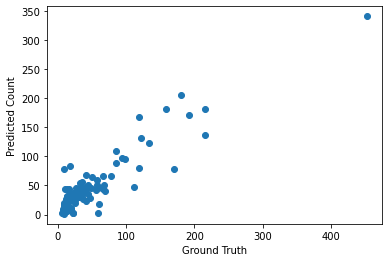

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gt_cnt_arr = np.array(np.load("gt_cnt_arr.npy"))
pred_cnt_arr = np.array(np.load("pred_cnt_arr.npy"))

plt.scatter(gt_cnt_arr, pred_cnt_arr)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Count')

**With Adaption**

In [ ]:
!python test.py --test_split val_PartA --adapt --gradient_steps 300

Evaluation on val_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/drive/My Drive/ML/Assignment_6/LearningToCountEverything/utils.py:132: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss += F.mse_loss(X,ones)
2851.jpg: actual-predicted:     61,   32.7, error:   28.3. Current MAE: 28.26, RMSE: 28.26:   0% 0/100 [00:10<?, ?it/s]
4167.jpg: actual-predicted:     10,    9.9, error:    0.1. Current MAE: 14.17, RMSE: 19.99:   1% 1/100 [00:21<17:06, 10.37s/it]
4105.jpg: actual-pred

Text(0, 0.5, 'Predicted Count')

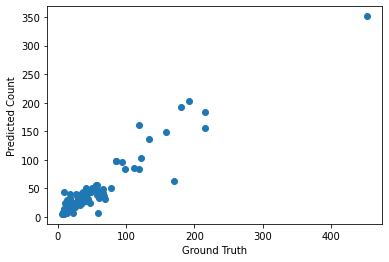

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gt_cnt_arr = np.array(np.load("gt_cnt_arr.npy"))
pred_cnt_arr = np.array(np.load("pred_cnt_arr.npy"))

plt.scatter(gt_cnt_arr, pred_cnt_arr)
plt.xlabel('Ground Truth')
plt.ylabel('Predicted Count')

# **Q2.4**

In [ ]:
!python test.py --test_split test_PartA --adapt --gradient_steps 300

Evaluation on test_PartA data
  0% 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything/utils.py:132: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss += F.mse_loss(X,ones)
6268.jpg: actual-predicted:      0,   30.6, error:   30.6. Current MAE: 30.57, RMSE: 30.57:   0% 0/100 [00:08<?, ?it/s]
7598.jpg: actual-predicted:      0,   25.3, error:   25.3. Current MAE: 27.94, RMSE: 28.06:   1% 1/100 [00:21<14:08,  8.57s/it]
4967.jpg: actual-pred

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
kaggle_arr = np.array(np.load("kaggle_arr.npy"))

In [ ]:
np.savetxt('Test_PartA.csv', kaggle_arr, delimiter=',',fmt = ['%s' , '%s'], header="Id,Count")

# **Q2.5)**

In [ ]:
!python test.py --test_split test --adapt --gradient_steps 300

Evaluation on test data
  0% 0/1190 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
2.jpg   : actual-predicted:      0,    8.6, error:    8.6. Current MAE:  8.62, RMSE:  8.62:   0% 0/1190 [00:11<?, ?it/s]
2.jpg   : actual-predicted:      0,    8.6, error:    8.6. Current MAE:  8.62, RMSE:  8.62:   0% 1/1190 [00:11<3:53:08, 11.77s/it]/content/drive/MyDrive/ML/Assignment_6/LearningToCountEverything/utils.py:132: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  Loss += F.mse_loss(X,ones)
3.jpg   : actual-predic

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
kaggle_arr = np.array(np.load("kaggle_arr.npy"))

In [ ]:
np.savetxt('Test.csv', kaggle_arr, delimiter=',',fmt = ['%s' , '%s'], header="Id,Count")